<a href="https://colab.research.google.com/github/DakshCodes13/EEA_WINTER_PROJECT/blob/main/ASSIGNMENT-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("classData.csv")

In [4]:
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [5]:
df.isnull().sum()

,0
G,0
C,0
B,0
A,0
Ia,0
Ib,0
Ic,0
Va,0
Vb,0
Vc,0


In [6]:
fault_types = df[['G','C', 'B', 'A']].to_numpy()
fault_types

array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [7]:
print(fault_types)

[[1 0 0 1]
 [1 0 0 1]
 [1 0 0 1]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [69]:
fault_type_labels = []  # Create an empty list to store the labels

for i in range(len(fault_types)):
    if np.array_equal(fault_types[i], [0, 0, 0, 0]):
        fault_type_labels.append('No fault') # Append the corresponding label
    elif np.array_equal(fault_types[i], [1, 0, 0, 1]):
        fault_type_labels.append('LG fault')
    elif np.array_equal(fault_types[i], [0, 0, 1, 1]):
        fault_type_labels.append('LL fault')
    elif np.array_equal(fault_types[i], [1, 0, 1, 1]):
        fault_type_labels.append('LLG fault')
    elif np.array_equal(fault_types[i], [0, 1, 1, 1]):
        fault_type_labels.append('LLL Fault')
    elif np.array_equal(fault_types[i], [1, 1, 1, 1]):
        fault_type_labels.append('LLLG fault')
    else:
        fault_type_labels.append('Unknown')  # Add an 'Unknown' label for unmatched cases
df.insert(0, 'Fault Type Labels', fault_type_labels)

# Now, fault_type_labels contains the string descriptions of the fault types
# You can use it as a separate array or combine it with the original data as needed.

In [70]:
df.head()

,Fault Type Labels,Fault Type Encoder,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,LG fault,1,1,0,0,1,0.413869,0.497571,0.543058,0.839985,0.384404,0.284358
1,LG fault,1,1,0,0,1,0.309366,0.460370,0.505251,0.767607,0.391930,0.349258
2,LG fault,1,1,0,0,1,0.215144,0.405429,0.449635,0.728956,0.399481,0.380317
3,LG fault,1,1,0,0,1,0.163683,0.381381,0.424998,0.704108,0.407055,0.397513
4,LG fault,1,1,0,0,1,0.135580,0.377775,0.420857,0.682749,0.414650,0.411189


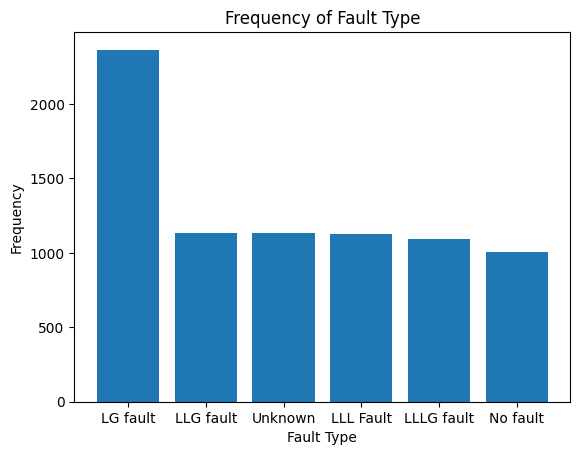

In [72]:
fault_counts = df['Fault Type Labels'].value_counts() # Replace 'Fault Type' with 'Fault Type Encoder' to access the correct column
plt.bar(df['Fault Type Labels'].unique(), fault_counts) # Replace 'Fault Type' with 'Fault Type Encoder' here as well
plt.xlabel('Fault Type')
plt.ylabel('Frequency')
plt.title('Frequency of Fault Type') # Correct typo ('Tupe' to 'Type')
plt.show()

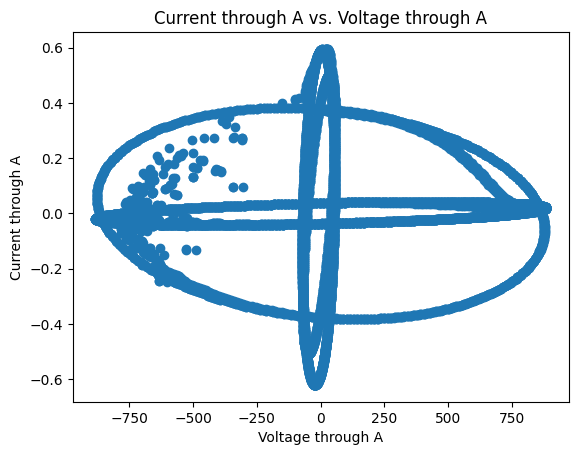

In [11]:
plt.scatter(df['Ia'],df['Va']) # Use plt.scatter to create the scatter plot
plt.xlabel("Voltage through A") # Add labels to the plot
plt.ylabel("Current through A")
plt.title("Current through A vs. Voltage through A")#for rainforest regressor
plt.show() # Display the plot

In [12]:
df['Ia'] = (df['Ia'] - df['Ia'].min()) / (df['Ia'].max() - df['Ia'].min())
df['Ib'] = (df['Ib'] - df['Ib'].min()) / (df['Ib'].max() - df['Ib'].min())
df['Ic'] = (df['Ic'] - df['Ic'].min()) / (df['Ic'].max() - df['Ic'].min())
df['Va'] = (df['Va'] - df['Va'].min()) / (df['Va'].max() - df['Va'].min())
df['Vb'] = (df['Vb'] - df['Vb'].min()) / (df['Vb'].max() - df['Vb'].min())
df['Vc'] = (df['Vc'] - df['Vc'].min()) / (df['Vc'].max() - df['Vc'].min())
print(df[['Ia','Ib','Ic','Va','Vb','Vc']]) # Use a list of columns for selection

            Ia        Ib        Ic        Va        Vb        Vc
0     0.413869  0.497571  0.543058  0.839985  0.384404  0.284358
1     0.309366  0.460370  0.505251  0.767607  0.391930  0.349258
2     0.215144  0.405429  0.449635  0.728956  0.399481  0.380317
3     0.163683  0.381381  0.424998  0.704108  0.407055  0.397513
4     0.135580  0.377775  0.420857  0.682749  0.414650  0.411189
...        ...       ...       ...       ...       ...       ...
7856  0.461942  0.524456  0.508940  0.588089  0.045309  0.882445
7857  0.462161  0.523902  0.509278  0.595783  0.042747  0.877341
7858  0.462389  0.523347  0.509609  0.603454  0.040299  0.872144
7859  0.462624  0.522792  0.509933  0.611100  0.037966  0.866856
7860  0.462868  0.522235  0.510250  0.618718  0.035749  0.861477

[7861 rows x 6 columns]


In [13]:
fault_type_encoder = []  # Create an empty list to store the labels

for i in range(len(fault_types)):
    if np.array_equal(fault_types[i], [0, 0, 0, 0]):
        fault_type_encoder.append(0) # Append the corresponding label
    elif np.array_equal(fault_types[i], [1, 0, 0, 1]):
        fault_type_encoder.append(1)
    elif np.array_equal(fault_types[i], [0, 0, 1, 1]):
        fault_type_encoder.append(2)
    elif np.array_equal(fault_types[i], [1, 0, 1, 1]):
        fault_type_encoder.append(3)
    elif np.array_equal(fault_types[i], [0, 1, 1, 1]):
        fault_type_encoder.append(4)
    elif np.array_equal(fault_types[i], [1, 1, 1, 1]):
        fault_type_encoder.append(5)
    else:
        fault_type_encoder.append(6)  # Add an 'Unknown' label for unmatched cases

# Now, fault_type_labels contains the string descriptions of the fault types
# You can use it as a separate array or combine it with the original data as needed.

In [14]:
df.insert(0, 'Fault Type Encoder', fault_type_encoder)

In [15]:
df.head()

,Fault Type Encoder,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,1,0,0,1,0.413869,0.497571,0.543058,0.839985,0.384404,0.284358
1,1,1,0,0,1,0.309366,0.460370,0.505251,0.767607,0.391930,0.349258
2,1,1,0,0,1,0.215144,0.405429,0.449635,0.728956,0.399481,0.380317
3,1,1,0,0,1,0.163683,0.381381,0.424998,0.704108,0.407055,0.397513
4,1,1,0,0,1,0.135580,0.377775,0.420857,0.682749,0.414650,0.411189


In [16]:
x = fault_types
y = df['Fault Type Encoder'].to_numpy()

print("Features")
print(x)
print(x.shape)
print("Fault Type")
print(y)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2) #Train-Test Split : Use an 80:20 split for training and testing

Features
[[1 0 0 1]
 [1 0 0 1]
 [1 0 0 1]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
(7861, 4)
Fault Type
[1 1 1 ... 0 0 0]
(7861,)


In [46]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=7,activation="softmax"))
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=100)# epochs are basically the number of iterations the dataset will use to train the model

Epoch 1/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3331 - loss: 1.8881
Epoch 2/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4649 - loss: 1.5540
Epoch 3/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7018 - loss: 1.2391
Epoch 4/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8531 - loss: 0.9226
Epoch 5/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.6777
Epoch 6/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.5098
Epoch 7/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3886
Epoch 8/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.3066
Epoch 9/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.2340
Epoch 10/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1803
Epoch 11/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.1341
Epoch 12/100
197/197 ━━━━━━━━━━━━━━━━━━━━

In [51]:
predictions = ann(x_test)
# Convert predictions to a NumPy array and move it to the CPU
predictions = predictions.numpy()

accuracy = accuracy_score(y_test, predictions.argmax(axis=1)) #Calculate accuracy after converting predictions to NumPy array and getting the class with highest probability
print(predictions)
print(accuracy)

# Use 'weighted' averaging for multi-class classification
precision = precision_score(y_test, predictions.argmax(axis=1), average='weighted') # Pass the class with highest probability to precision_score
print('Precision: ',precision)
recall = recall_score(y_test, predictions.argmax(axis=1), average='weighted') # Pass the class with highest probability to recall_score
print('Recall: ',recall)
f1_weighted = f1_score(y_test, predictions.argmax(axis=1), average='weighted') # Pass the class with highest probability to f1_score
print('Weighted-average F1 score: ', f1_weighted)

[[1.57969058e-04 9.99306794e-04 1.17412427e-10 ... 1.39709364e-11
  9.46751039e-04 1.49729951e-15]
 [8.88263457e-05 4.48770834e-06 4.92849894e-09 ... 7.52753112e-04
  9.98269260e-01 7.83423282e-09]
 [9.98289704e-01 3.13506862e-05 5.53735954e-05 ... 7.39533352e-05
  1.12784837e-04 2.58911430e-04]
 ...
 [1.57969043e-04 9.99306794e-04 1.17412413e-10 ... 1.39709355e-11
  9.46750981e-04 1.49729940e-15]
 [9.98289645e-01 3.13506862e-05 5.53735917e-05 ... 7.39533280e-05
  1.12784830e-04 2.58911401e-04]
 [1.57969043e-04 9.99306794e-04 1.17412427e-10 ... 1.39709355e-11
  9.46750981e-04 1.49729940e-15]]
1.0
Precision:  1.0
Recall:  1.0
Weighted-average F1 score:  1.0


In [53]:
predictions.shape

(1573, 7)

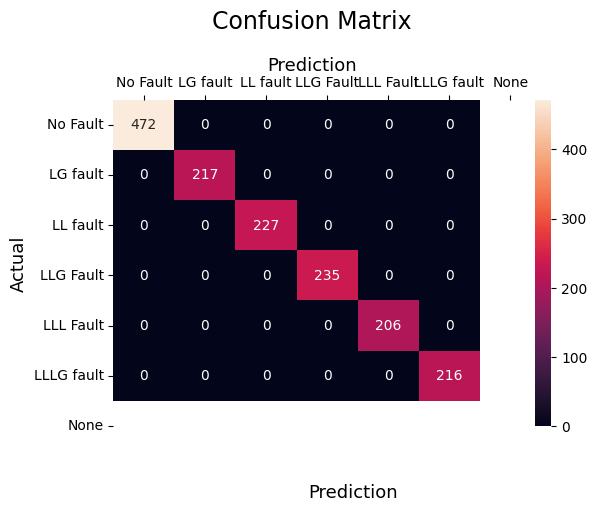

In [56]:
sns.heatmap(confusion_matrix(y_test, predictions.argmax(axis=1)),
            annot=True,
            fmt='g',
            xticklabels=['No Fault','LG fault','LL fault','LLG Fault','LLL Fault','LLLG fault','None'],
            yticklabels=['No Fault','LG fault','LL fault','LLG Fault','LLL Fault','LLLG fault','None'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

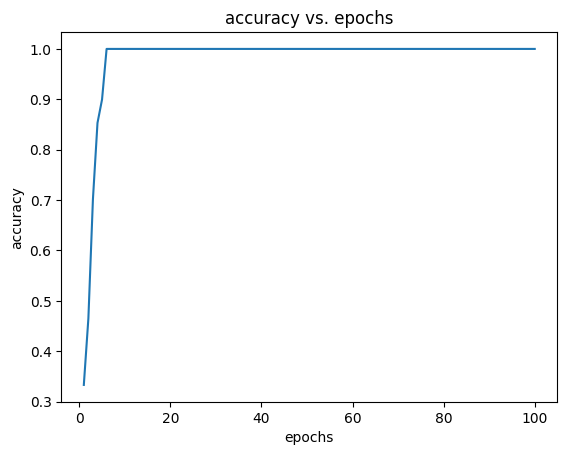

In [66]:


acc = [0.3331,0.4649,0.7018,0.8531,0.8996]
for i in range(6,101):
    acc.append(1)
acc_arr = np.array(acc)
plt.plot(range(1,101),acc) # Use plt.scatter to create the scatter plot
plt.xlabel("epochs") # Add labels to the plot
plt.ylabel("accuracy")
plt.title("accuracy vs. epochs")#for rainforest regressor
plt.show() # Display the plot

